In [1]:
import pandas as pd
display(pd.__version__)
import numpy as np
pd.options.display.max_rows = 100
import random

'1.1.4'

In [2]:
random.seed(4711)

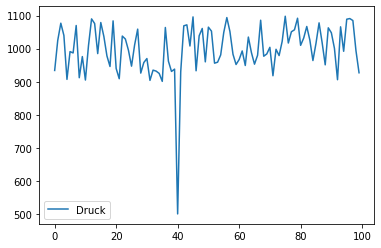

In [3]:
# moderat schwankende Beispiel-Daten
df = pd.DataFrame({"Druck":random.sample(range(900, 1100), 100)}) 

# Beispiel für einen Ausreißer setzten
df.iloc[40] = 500
df.plot();

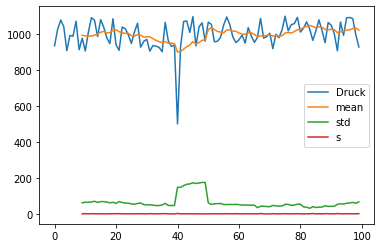

In [4]:
# Vorschlag:
# Abweichung vom Rollenden Mittelwert, gemessen in Einheiten von Rollender Standartabweichung
# 1 Standartabweichung ~ 66%, 2 ~ 95%, 3~99% ... wahrscheinlichkeit, dass der gemessene Wert "zu den anderen passt" (aus der gleichen Verteilung: Mittelwert, Form, Varianz... stammt)
WINDOW_LENGTH = 10
df["mean"] = df["Druck"].rolling(WINDOW_LENGTH).mean()
df["std"] = df["Druck"].rolling(WINDOW_LENGTH).std()
df["s"] = np.abs((df["Druck"] - df["mean"])/df["std"]) # np.abs

# Problem 1: Vorlauf durch Fensterbreite
# Problem 2 (theoretisch): Exakt gleiche Werte innerhalb der Messwerte führen zu std=NAN
df.plot()

In [5]:
FILTER = df["s"]>2 # Werte sind mehr als eine/zwei/drei Standardabweichung vom gleitenden Mittelwert entfernt
df[FILTER]

Druck   mean         std         s
40    500  899.2  147.584100  2.704898
67   1086  988.6   42.695823  2.281254

In [6]:
df["Druck"].min() # Minimum *ALLE* Werte ( nicht erwünscht )

500

In [7]:
df.loc[~FILTER,"Druck"].min() # Minimum der Werte, die *NICHT* mehr als eine Standardabweichung vom gleitenden Mittelwert entfernt sind

901

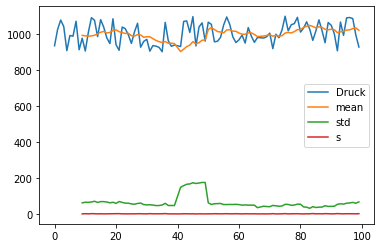

In [8]:
df[~FILTER].plot()